<a href="https://colab.research.google.com/github/sarewes2310/CNN-WOA/blob/master/Dicoding_machine_learning_pemula_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Custom Library**
Proses installasi library tambahan yang tidak terdapat default dalam notebook.


---



In [ ]:
!pip install request

ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request


# **Library**

Daftar library yang digunakan dalam notebook.



In [ ]:
#tensorflow library
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing import image
#plot library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
#utility library
from google.colab import files #khusus google colab
import cv2 #khusus google colab
import zipfile
import os
import re
import requests
import shutil
import gc

Using TensorFlow backend.


# **Custom Class and Function**
Sumber code class atau fungsi yang digunakan dalam notebook. Pembuatan custom class atau fungsi berfungsi untuk meringkas code dalam notebook.



---



### Class DatasetKuTercinta

class yang digunakan untuk memanggil dataset dari folder yang ada di dalam google drive.

In [ ]:
class DatasetKuTercinta(object):
  
  """Initial function
  # Arguments
      debug: Input Boolean
  # Returns
      None
  """
  def __init__(self, 
               debug=False):
    self.folder = ''
    self.namefiles = ''
    self.train_datagen = None
    self.test_datagen = None
    self.proses = 0
    self.debug = debug
  
  """Message function
  # Arguments
      msg: Input message (String)
      types: Input type output (Integer)
  # Returns
      print or string message
  """
  def message(self,
             msg,
             types=0):
    if types is 1:
        return '['+str(self.proses)+'] '+msg
    print('['+str(self.proses)+'] '+msg)

  """Raise error function
  # Arguments
      msg: Input message (String)
      types: Input type output (Integer)
  # Returns
      print or string message
  """
  def raiseError(self,
                 msg,
                 types=0):
    if types is 0:
        raise ValueError(msg)
    raise NameError(msg)

  """Download dataset function
  # Arguments
      url: Input url dataset (String)
      folder: Input folder dataset (String)
      namefile: Input nama dataset (String)
  # Returns
      None
  """
  def downloadDataset(self,
                      url='',
                      folder='', 
                      namefile=''):
    self.proses += 1
    self.message('Checking folder pada system...')
    if not self.checkFolder(folder):
        self.message('Folder tidak ditemukan, maka membuat folder...')
        self.message('Proses pembuatan folder.......')
        self.makeFolder(folder)
        self.message('Proses pembuatan folder selesai')
    else:
        self.message('Folder Ditemukan !!!')

    if folder is '':
        folder = ''
    self.folder = folder
    
    self.message('Checking file dataset pada system...')
    if not self.checkFile(folder, namefile):
        self.message('File dataset tidak ditemukan, maka download file...')
        
        response = requests.get(url, allow_redirects = True)
        opens = ''
        if namefile is '':
            opens = folder + 'dataset.zip'
        else:
            opens = folder + namefile

        try:
            open(opens, 'wb').write(response.content)
        except IOError as e:
            self.message("I/O error({0}): {1}".format(e.errno, e.strerror))
        self.message('Proses download file selesai')
    else:
        self.message('File dataset sudah di download !!!')

    if namefile is '':
        self.namefiles = 'dataset.zip'
    else:
        self.namefiles = namefile
    
  """Open dataset function
  # Arguments
      folder: Input folder dataset (String)
      namefiles: Input nama files dataset (String)
  # Returns
      None
  """
  def openDataset(self, 
                  folder='',
                  namefiles=''):
    self.proses += 1

    #Checking Arguments
    if folder is not '':
        self.folder = folder
    if namefiles is not '':
        self.namefiles = namefiles
    
    #Proses Extrack File
    self.message('Proses extrak file '+self.namefiles+'...')
    if self.checkFile(self.folder + self.namefiles):
        if self.debug:
            print('mantappppp')
        open_file = self.folder + self.namefiles
        extract_zip = zipfile.ZipFile(open_file, 'r')
        extract_zip.extractall(self.folder)
        extract_zip.close()
    self.message('Proses extrak file '+self.namefiles+' selesai')
    
    #Pembuatan File Train
    if not self.checkFolder(self.folder + 'train'):
        self.message('Folder train tidak ditemukan, maka membuat folder...')
        self.message('Proses pembuatan folder train.......')
        self.makeFolder(self.folder + 'train')
        self.message('Proses pembuatan folder train selesai')
    else:
        self.message('Folder train ditemukan !!!')
    
    #Pembuatan File Validation
    if not self.checkFolder(self.folder + 'validation'):
        self.message('Folder validation tidak ditemukan, maka membuat folder...')
        self.message('Proses pembuatan folder validation.......')
        self.makeFolder(self.folder + 'validation')
        self.message('Proses pembuatan folder validation selesai')
    else:
        self.message('Folder validation ditemukan !!!')
    
    self.traindir = os.path.join(self.folder, 'train')
    self.validationdir = os.path.join(self.folder, 'validation')
  
  """Check file function
  # Arguments
      folder: Input folder dataset (String)
      namefile: Input nama dataset (String)
  # Returns
      If file not found, output will False otherwise True
  """
  def checkFile(self,
                folder='',
                namefile=''):
    if not os.path.isfile(folder + namefile):
        return False
    return True

  """Check folder function
  # Arguments
      folder: Input nama folder (String)
  # Returns
      If folder not found, output will False otherwise output True
  """
  def checkFolder(self, 
                  namefolder=''):
    if not os.path.exists(namefolder):
        return False
    return True

  """Make folder function
  # Arguments
      namefolder: Input nama folder (String)
  # Returns
      None
  # Raises
      if make folder fault, show errors.
  """
  def makeFolder(self, 
                 namefolder=''):
    try:
        os.mkdir(namefolder)
    except OSError as error:
        self.message(error)

  """Generator file function
  # Arguments
      rescale: Input folder dataset (String)
      rotation: Input nama dataset (String)
  # Returns
      If file not found output 
  """
  def generatorFileDataset(self, 
                       rescale=(1./255), 
                       rotation=20, 
                       horizontal_flip=False,
                       shear_range=0.2):
    self.train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
    self.test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
    #print(self.test_datagen)

  """Split dataset function
  # Arguments
      target_sizes: Input sizes WXH (List)
      batch_size: Input jumlah batch size (Integer)
      class_mode: Input nama class mode (String)
  # Returns
      If file not found output 
  """
  def splitDataset(self, 
                   target_sizes=(150, 150), 
                   batch_size=4,
                   class_mode='categorical'):
    #train, test = generatorDataset
    #print(generatorDataset)
    t_g = self.train_datagen.flow_from_directory(self.traindir,
                                                 target_size=target_sizes, 
                                                 batch_size=batch_size,
                                                 class_mode=class_mode)
    v_g = self.test_datagen.flow_from_directory(self.traindir,
                                                target_size=target_sizes, 
                                                batch_size=batch_size,
                                                class_mode=class_mode)
    return [t_g, v_g]

  """Random generator dataset function
  # Arguments
      namefiles: Input nama dataset (String)
      listclassfolder: Input folder dataset (String)
      persen_valid: Input folder dataset (String)
      formatfile: Input folder dataset (String)
      folderdataset: Input folder dataset (String)
  # Returns
      If file not found output 
  """
  def randomGenerateFolderDataset(self,
                                  namefiles='',
                                  listclassfolder=['paper', 'rock', 'scissors'], 
                                  persen_valid=[60, 40],
                                  formatfile=['.jpg','.png'],
                                  folderdataset=['paper', 'rock', 'scissors']):
    self.proses += 1

    #Checking Arguments
    if len(listclassfolder) is 0:
        self.raiseError(self.message('Daftar nama class folder untuk data '+ \
                     'training dan validation belum di masukkan'), 1)
    if len(folderdataset) is 0:
        self.raiseError(self.message('Folder dimana tempat file dataset '+ \
                     'disimpan belum dimasukkan'), 1)
    if self.namefiles is None and namefiles is not '':
        self.namefiles = namefiles
    elif self.namefiles is None and namefiles is '':
        self.raiseError(self.message('Nama file belum diberikan'), 1)
    
    #Random file positions file for dataset
    listfilefolder = [None] * len(folderdataset)
    pathfix = re.sub(self.regexFormatFile(self.namefiles), '', self.namefiles)
    for x in range(0, len(folderdataset)):
        fullfolder = os.listdir(self.folder+pathfix+'/'+folderdataset[x])
        listfilefolder[x] = fullfolder
        countfiles = len(listfilefolder[x])
        if self.debug:
            print(fullfolder)
            print('countfiles: '+ str(countfiles))
        for z in range(0, countfiles):
            r = np.random.randint(countfiles-1)
            switch = listfilefolder[x][z]
            listfilefolder[x][z] = listfilefolder[x][r]
            listfilefolder[x][r] = switch
    
    #Process split file training and validation
    files_train = [None] * len(folderdataset)
    files_valid = [None] * len(folderdataset)
    for x in range(0, len(listfilefolder)):
        countfiles = len(listfilefolder[x])
        start = int(60/100*countfiles)
        files_train[x] = listfilefolder[x][:start]
        files_valid[x] = listfilefolder[x][start:]
        
    #Process move file dataset
    for x in range(0, len(listclassfolder)):
        folder_train = self.folder + 'train/' + listclassfolder[x]
        folder_valid = self.folder + 'validation/' + listclassfolder[x]
        print('test_folder:', folder_train)
        
        #Check folder training
        self.message('Checking Keberadaan Folder Training dan Validation')
        if not self.checkFolder(folder_train):
          self.message('Folder train/'+listclassfolder[x]+ \
                       ' tidak ditemukan, maka membuat folder...')
          self.message('Proses pembuatan folder validation.......')
          self.makeFolder(folder_train)
          self.message('Proses pembuatan folder train/'+listclassfolder[x]+ \
                       ' selesai')
        else:
          self.message('Folder train/'+listclassfolder[x]+' ditemukan !!!')
        
        #Check folder validation
        if not self.checkFolder(folder_valid):
          self.message('Folder validation/'+listclassfolder[x]+ \
                       ' tidak ditemukan, maka membuat folder...')
          self.message('Proses pembuatan folder validation/'+ \
                       listclassfolder[x]+'.......')
          self.makeFolder(folder_valid)
          self.message('Proses pembuatan folder validation/'+ \
                       listclassfolder[x]+' selesai')
        else:
          self.message('Folder validation/'+listclassfolder[x]+ \
                       ' ditemukan !!!')
        self.message('Checking Selesai !!!')
          
        #Move file training
        self.message('Proses pemindahan file ke folder train/'+ \
                    listclassfolder[x])
        for y in range(0, len(files_train[x])):
            shutil.move(self.folder+pathfix+'/'+folderdataset[x]+'/'+ \
                        files_train[x][y], folder_train)
        self.message('Proses pemindahan file ke folder train/'+ \
                    listclassfolder[x]+' selesai')
        
        #Move file validation
        self.message('Proses pemindahan file ke folder validation/'+ \
                    listclassfolder[x])
        for y in range(0, len(files_valid[x])):
            shutil.move(self.folder+pathfix+'/'+folderdataset[x]+'/'+ \
                    files_valid[x][y], folder_valid)
        self.message('Proses pemindahan file ke folder validation/'+ \
                    listclassfolder[x]+' selesai')
    
    return True

  """Regex format file function
  # Arguments
      data: Input nama file (String)
  # Returns
      remove extension from nama file
  """
  def regexFormatFile(self,
                     data):
    return re.sub('^.[A-Za-z0-9]+','',data)

### Class Uploader Image
custom class yang dipakai untuk menghandle upload image. 

In [ ]:
class customUploader(object):
    def __init__(self):
        pass
    
    def upload(self, 
               model=None,
               target_size=(224, 224),
               path='/content/',
               batch_size=20,
               verbose=0):
        uploaded = files.upload()
        listfolderku = ['paper', 'rock', 'scissors']

        for fn in uploaded.keys():

            # predicting images
            path = fn
            img = image.load_img(path, target_size=target_size)
            imgplot = plt.imshow(img)
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)

            images = np.vstack([x])
            classes = model.predict(images, 
                                    batch_size=batch_size)[0].tolist()

            names_d = ''
            for x in range(0, len(listfolderku)):  
                print(classes[x])      
                if classes[x]==1:
                    names_d = listfolderku[x]
                    break
                else:
                    names_d = 'Tidak terdeteksi'
        
        return names_d

    def removeFile(self,
                   folder=''):
        pass

### Class Model Training
custom class yang dipersiapkan untuk regulazition pada proses convolutional layer agar menghindari overfitting. Dalam jurnal penelitian dari '' didapatkan sebuah informasi bahwa dalam membangun model terlalu banyak layer dengan tidak didukung dataset yang besar akan menyebabkan terjadinya overfitting pada model **(sudah mencoba menggunakan arsitektur vgg-16 dan hasilnya overfitting)**, berhubung dalam course ini menggunakan dataset yang kecil maka menggunakan opsi arsitektur default yang ada dalam course merupakan opsi terbaik.  **NOTE:** jenis runtime menggunakan GPU agar mempercepat proses training model.

In [ ]:
class CustomModelTraining(object):
    def __init__(self):
        pass

    def prosesModel(self,
                    epoch=None,
                    loss=None,
                    optimizer=None,
                    train=None,
                    valid=None,
                    h_p=[32, 64, 128, 128, 512],
                    i_s=(224, 224, 3),
                    batch=(75, 15),
                    verbose=2):
        self.model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(h_p[0], 
                                (3,3), 
                                activation='relu', 
                                #input_shape=(150, 150, 3)),
                                input_shape=i_s),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(h_p[1],  
                                (3,3), 
                                activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(h_p[2], 
                                (3,3), 
                                activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(h_p[3], 
                                (3,3),
                                activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(h_p[4], 
                                activation='relu'),
            tf.keras.layers.Dense(3, 
                                activation='sigmoid')
        ])

        self.compileModel('adam',
                          optimizer)
        output = self.fit(epoch, 
                          train,
                          valid,
                          [75, 15])
        
        return [self.model, 
                output,
                self.evaluate(valid, 
                              self.model)[0]]
        
    def clearModel(self,
                   model):
        tf.keras.backend.clear_session()
        del model
        gc.collect()

    def compileModel(self,
                     optimizer,
                     loss,
                     metrics=['accuracy']):
        self.model.compile(loss=loss,
                           optimizer=optimizer,
                           metrics=metrics)

    def summary(self):
        self.model.summary()

    def fit(self,
            epoch,
            train,
            validation,
            batch=[75, 15],
            patience=10,
            verbose=2):
        checkpoint = ModelCheckpoint("default_1.h5", 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             period=1)
        early = EarlyStopping(monitor='val_accuracy', 
                            min_delta=0, 
                            patience=patience, 
                            verbose=1, 
                            mode='auto')
        history = self.model.fit(train,
                                 steps_per_epoch=batch[0],  # berapa batch yang akan dieksekusi pada setiap epoch
                                 epochs=epoch,
                                 validation_data=validation, # menampilkan akurasi pengujian data validasi
                                 validation_steps=batch[1],  # berapa batch yang akan dieksekusi pada setiap epoch
                                 verbose=verbose)
        return [history.history['accuracy'],
                history.history['val_accuracy'],
                history.history['loss'],
                history.history['val_loss']]

    def evaluate(self,
                 test,
                 model,
                 batch=10):
        return model.evaluate(test, batch_size=batch)

    def plot(self,
			 title,
             data,
			 theme=0):
        fig = plt.figure()
        loss_table = fig.add_subplot(111)
        loss_table.set_title('Loss / ' + title)
        loss_table.plot(data[2], label='train')
        loss_table.plot(data[3], label='test')
		
        if theme is 1:
            loss_table.spines['bottom'].set_color('white')
            loss_table.spines['top'].set_color('white')
            loss_table.xaxis.label.set_color('white')
            loss_table.tick_params(axis='x', colors='white')
            
            loss_table.spines['left'].set_color('white')
            loss_table.spines['right'].set_color('white')
            loss_table.yaxis.label.set_color('white')
            loss_table.tick_params(axis='y', colors='white')
        
        loss_table.legend()
        plt.show()
        
        fig = plt.figure()
        acc_table = fig.add_subplot(111)
        acc_table.set_title('Accuracy / ' + title)
        acc_table.plot(data[0], label='train')
        acc_table.plot(data[1], label='test')
        
        if theme is 1:
            acc_table.spines['bottom'].set_color('white')
            acc_table.spines['top'].set_color('white')
            acc_table.xaxis.label.set_color('white')
            acc_table.tick_params(axis='x', colors='white')
            
            acc_table.spines['left'].set_color('white')
            acc_table.spines['right'].set_color('white')
            acc_table.yaxis.label.set_color('white')
            acc_table.tick_params(axis='y', colors='white')
        
        acc_table.legend()
        plt.show()

### Class WOA (Whale Optimization Algorithm)

Dalam membangun sebuah model dari algoritma convolutional neural network kegiatan paling mendasar adalah mentuning hyperparameter dan arsitektur yang tepat sesuai dengan dataset yang digunakan, cara paling mudah dalam menemukannya dengan ujicoba satu persatu hyperparameter tersebut. Tetapi kegiatan tersebut membutuhkan waktu yang relatif lama dan juga terdapat banyak hyperparameter yang harus di tuning dan juga arsitektur yang harus dicoba. Untuk mengatasi permasalahan tersebut salah satu metode yang dapat digunakan adalah pendekatan metode multiobjective dan singleobjective, karena pada notebook ini untuk meningkatkan akurasi lebih baik menggunakan pendekatan metode multiobjective sebab tidak terjebak local optimum[1][5]. Pengaplikasian pendekatan metode multiobjective dapat ditemukan pada metaheuristic algorithm[5]. Pada notebook ini digunakan metaheuristic algorithm bertipe swarm, yaitu Whale Optimization Algorithm. Komponen yang digunakan sebagai hyperparameter yang di optimalkan adalah **Convolutional Layer** dan **Dense Layer**

In [ ]:
class WOA(object):
	"""docstring for WOA"""
	def __init__(self):
		super(WOA, self).__init__()

	def C(self, r):
		return 2*r

	def A(self, a, r):
		return (2*a)*r - a

	def generateR(self):
		return [np.random.rand(),
				np.random.rand()]

	"""
	Fungsi yang digunakan untuk menjalankan perhitungan dari
	algoritma Whale Optimization Algorithm

	Keterangan parameter:
		MaxIter:
		dim:
		ub:
		lb:
		FName:
		searchAgents:
	"""
	#@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
	def calculate(self,
				  MaxIter=50,
				  dim=30,
				  loss=None,
				  optimizer=None,
				  train=None,
				  valid=None,
				  lb=[0, 0, 0],
				  ub=[3, 3, 6],
				  FData=None,
				  searchAgents=4):

		leader_pos = np.zeros((1, dim))
		leader_score = np.inf
		leader_model = None
		leader_history = [[]]*4
		positions = self.inisialisasiVariabelPosisi(searchAgents, dim, ub, lb)
		convergence_curve = np.zeros((2, MaxIter))

		for t in range(0, MaxIter):
			print('Iterasi ke-'+str(t))
			for x in range(0, len(positions)):
				Flag4ub = positions[x, :] >= ub
				Flag4lb = positions[x, :] < lb
				positions[x,:] = (positions[x, :]*(~(Flag4ub+Flag4lb))) + (ub*Flag4ub) + (lb*Flag4lb)

				#fitness = getattr(Benchmark, FName)(positions[x,:])
				#print("FITNESS: ", fitness)
				print(positions[x,:].astype(int))
				dataM = [FData[0][positions[x,0].astype(int)],
				         FData[1][positions[x,1].astype(int)],
						 FData[2][positions[x,2].astype(int)],
						 FData[3][positions[x,3].astype(int)],
						 FData[4][positions[x,4].astype(int)]]
				print(dataM)
				models = CustomModelTraining()
				ob_models, history, fitness = models.prosesModel(20,
				                                                 loss,
																 optimizer,
																 train,
																 valid,
																 dataM)
				models.clearModel(models)

				if fitness < leader_score:
					leader_score = fitness
					leader_pos = positions[x, :]
					leader_history = history
					leader_model = ob_models

			a = 2-t*((2)/MaxIter)
			a2=-1+t*((-1)/MaxIter)

			for x in range(0, len(positions)):
				r1 = np.random.rand() #generate random value
				r2 = np.random.rand() #generate random value

				A = self.A(a, r1)
				C = self.C(r2)

				#A = (2*a)*r1 - a
				#C = 2*r2

				b = 1
				l = (a2 - 1)*np.random.rand() + 1

				p = np.random.rand()

				for z in range(0, len(positions[x, :])):
					if p < 0.5:
						if abs(A) >= 1:
							rand_leader_index = np.floor((searchAgents-1)*np.random.rand()+1)
							#rand_leader_index = np.floor(searchAgents*np.random.rand())
							#print("rand_leader_index: ",int(rand_leader_index))
							X_rand = positions[int(rand_leader_index), :]
							D_X_rand = abs(C*X_rand[z] - positions[x, z])
							positions[x, z] = X_rand[z] - A*D_X_rand
						elif abs(A) < 1:
							D_Leader = abs(C*leader_pos[z] - positions[x, z])
							positions[x, z] = leader_pos[z] - A*D_Leader
					elif p >= 0.5:
						distance2Leader = abs(leader_pos[z] - positions[x, z])
						positions[x, z] = distance2Leader*np.exp(b*l)*np.cos(l*2*np.pi) + leader_pos[z]

			convergence_curve[1, t] = leader_score
			convergence_curve[0, t] = t

		return [leader_score, 
		        leader_history, 
				convergence_curve, 
				leader_model]

	#@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
	def inisialisasiVariabelPosisi(self,
				  searchAgents,
				  dim=30,
				  ub=None,
				  lb=None):
		boundary_no = isinstance(ub, int)
		if boundary_no:
			return np.random.rand(searchAgents, dim) * (ub-lb)+lb
		else:
			positions = np.zeros((searchAgents, dim))
			for x in range(0, dim):
				ub_x = ub[x]
				lb_x = lb[x]
				positions[:, x] = np.ceil(np.random.rand(1, searchAgents) * (ub_x-lb_x)+lb_x)
			return positions

# **Dataset**
Panggil custom class untuk mendownload dataset dan membaginya kedalam folder train dan validation. Pada notebook ini menggunakan metode holdout dalam validasinya dengan rasio 60:40 dimana 60 untuk train dan 40 untuk validation.




In [ ]:
data = DatasetKuTercinta(False)

Download dataset

In [ ]:
#Google colab
data.downloadDataset('https://dicodingacademy.blob.core.windows.net/'+ \
                     'picodiploma/ml_pemula_academy/rockpaperscissors.zip', #Link URL https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
                     '/content/datasetku/', #Folder download dataset
                     'rockpaperscissors.zip') #Nmaa yang akan digunakan pada hasil download
#Local windows
"""data.downloadDataset('https://dicodingacademy.blob.core.windows.net/'+ \
                     'picodiploma/ml_pemula_academy/rockpaperscissors.zip', 
                     '../datasets/TA/',
                     'rockpaperscissors.zip')"""
data.openDataset()

[1] Checking folder pada system...
[1] Folder tidak ditemukan, maka membuat folder...
[1] Proses pembuatan folder.......
[1] Proses pembuatan folder selesai
[1] Checking file dataset pada system...
[1] File dataset tidak ditemukan, maka download file...
[1] Proses download file selesai
[2] Proses extrak file rockpaperscissors.zip...
[2] Proses extrak file rockpaperscissors.zip selesai
[2] Folder train tidak ditemukan, maka membuat folder...
[2] Proses pembuatan folder train.......
[2] Proses pembuatan folder train selesai
[2] Folder validation tidak ditemukan, maka membuat folder...
[2] Proses pembuatan folder validation.......
[2] Proses pembuatan folder validation selesai


Split dataset kedalam dua bentuk test dan pelatihan.

In [ ]:
listfolderku = ['paper', 'rock', 'scissors']
data.randomGenerateFolderDataset('rockpaperscissors.zip',
                                 listfolderku, 
                                 [60, 40], 
                                 ['.jpg','.png'], 
                                 listfolderku) 
data.generatorFileDataset()
train_generator, validation_generator=data.splitDataset((224, 224))
#print(train_generator, validation_generator)

test_folder: /content/datasetku/train/paper
[3] Checking Keberadaan Folder Training dan Validation
[3] Folder train/paper tidak ditemukan, maka membuat folder...
[3] Proses pembuatan folder validation.......
[3] Proses pembuatan folder train/paper selesai
[3] Folder validation/paper tidak ditemukan, maka membuat folder...
[3] Proses pembuatan folder validation/paper.......
[3] Proses pembuatan folder validation/paper selesai
[3] Checking Selesai !!!
[3] Proses pemindahan file ke folder train/paper
[3] Proses pemindahan file ke folder train/paper selesai
[3] Proses pemindahan file ke folder validation/paper
[3] Proses pemindahan file ke folder validation/paper selesai
test_folder: /content/datasetku/train/rock
[3] Checking Keberadaan Folder Training dan Validation
[3] Folder train/rock tidak ditemukan, maka membuat folder...
[3] Proses pembuatan folder validation.......
[3] Proses pembuatan folder train/rock selesai
[3] Folder validation/rock tidak ditemukan, maka membuat folder...
[3] 

**Opsi Hapus Dataset (Hanya digunakan untuk menghapus dataset)

In [ ]:
#Google Colab
shutil.rmtree('/content/datasetku')
#Local Windows
#shutil.rmtree('../datasets/TA/')

# **Model**
Berisi kumpulan proses pembuatan model dari algoritma convolutional yang akan dituning hyperparameter nya.


---



### Model arsitektur **WOA** (Default)

Arsitektur yang hyperparamternya dicari menggunakan metaheuristic algorithm, yaitu Whale Optimization Algorithm

In [ ]:
modelWOA = WOA()
dataModelWOA = modelWOA.calculate(3, #Iterasi
                                  5, #Dimensi
                                  'adam',
                                  'mean_squared_error',
                                  train_generator, #Train Data
                                  validation_generator, #Validation Data
                                  [0, 0, 0, 0, 0], #lb
                                  [2, 2, 2, 2, 5], #ub
                                  [[32, 64, 128], #Convolutional Layer 1
                                   [32, 64, 128], #Convolutional Layer 2
                                   [32, 64, 128], #Convolutional Layer 3
                                   [32, 64, 128], #Convolutional Layer 4
                                   [16, 32, 64, 128, 256, 512]]) #Dense Layer

Iterasi ke-0
[2 1 1 2 2]
[128, 64, 64, 128, 64]
Epoch 1/20
75/75 - 5s - loss: 0.2285 - accuracy: 0.3267 - val_loss: 0.2231 - val_accuracy: 0.3500
Epoch 2/20
75/75 - 5s - loss: 0.2163 - accuracy: 0.3800 - val_loss: 0.1831 - val_accuracy: 0.6333
Epoch 3/20
75/75 - 5s - loss: 0.1344 - accuracy: 0.7100 - val_loss: 0.0884 - val_accuracy: 0.8500
Epoch 4/20
75/75 - 5s - loss: 0.0935 - accuracy: 0.8367 - val_loss: 0.1111 - val_accuracy: 0.7333
Epoch 5/20
75/75 - 5s - loss: 0.0706 - accuracy: 0.8533 - val_loss: 0.0547 - val_accuracy: 0.9000
Epoch 6/20
75/75 - 5s - loss: 0.0608 - accuracy: 0.8900 - val_loss: 0.0685 - val_accuracy: 0.8500
Epoch 7/20
75/75 - 5s - loss: 0.0686 - accuracy: 0.8767 - val_loss: 0.0604 - val_accuracy: 0.8833
Epoch 8/20
75/75 - 5s - loss: 0.0529 - accuracy: 0.9000 - val_loss: 0.0533 - val_accuracy: 0.8833
Epoch 9/20
75/75 - 5s - loss: 0.0534 - accuracy: 0.9067 - val_loss: 0.0298 - val_accuracy: 0.9333
Epoch 10/20
75/75 - 5s - loss: 0.0498 - accuracy: 0.9200 - val_loss: 0

Delete model **(OPSI)**

In [ ]:
tf.keras.backend.clear_session()
del dataModelWOA[3]
gc.collect()

88192

### Evaluate Model

proses melakukan tuning hyperparameter untuk model yang telah di compile

328/328 [==============================] - 16s 48ms/step - loss: 0.0194 - accuracy: 0.9688
Loss:  0.019350752234458923
Accuracy:  0.96875


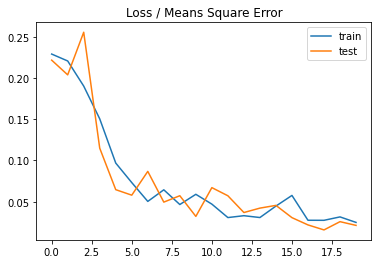

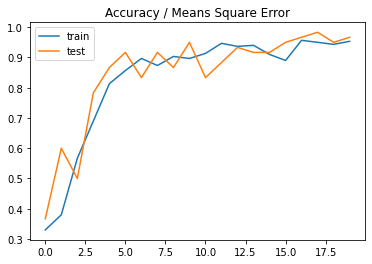

In [ ]:
customPlot = CustomModelTraining()
loss, accuracy = customPlot.evaluate(validation_generator,
                                     dataModelWOA[3],
                                     25)
print('Loss: ', str(loss))
print('Accuracy: ', str(accuracy))
#print(dataModelWOA[3].evaluate(validation_generator))
customPlot.plot('Means Square Error',
                dataModelWOA[1])


# **Upload File**
Menu untuk mengupload file gambar.


Saving 2gd0aqAxW55bHZP9.png to 2gd0aqAxW55bHZP9.png
0.0
0.0
1.0
scissors


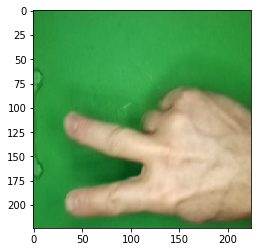

In [ ]:
uploader = customUploader()
print(uploader.upload(dataModelWOA[3], 
                      (224, 224)))

# **Referensi**

Daftar referensi yang dipakai dalam notebook ini.

---



1. Gu, J., Wang, Z., Kuen, J., Ma, L., Shahroudy, A., Shuai, B., ... & Chen, T. (2018). Recent advances in convolutional neural networks. Pattern Recognition, 77, 354-377. 
2. Mirjalili, S., & Lewis, A. (2016). The whale optimization algorithm. Advances in engineering software, 95, 51-67.
3. Referensi code [callbacks tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback/)
4. Referensi code [earlystopping tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) 
5. Ojha, V. K., Abraham, A., & Snášel, V. (2017). Metaheuristic design of feedforward neural networks: A review of two decades of research. Engineering Applications of Artificial Intelligence, 60, 97-116.
